Copyright (c) 2019 OERCompBiomed (SDU)

## Graph/network theory
- In this notebook we will show you some of the common commands you can use when you study and make network graphs using Python. We will use a simple example with a bunch of kids who have been interacting with each other during a school day. Some of them got sick with a virus infection later same day. We will study the network to see if it can tell us something about the transmission of the virus among the kids.The notebook contain in total four exercises (+ one extra). 


## Installation of libraries and necessary software
- Code to install libraries
- State that this has to be run only once
- If necessary, further installation instructions

In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
from operator import itemgetter
import pandas as pd


warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

## Loading data

- Load the two csv files: 
        Kids_nodes.csv (contains names and information about whether the kid got sick or not) 
        Kids_edges.cvs (contains information about who played with whom)
        (If you would like to see the content of the two files use pd.read_csv("kids_nodes.csv") and pd.read_cs("kids_edges.csv"))

In [2]:
import csv
# Open the file with nodes
with open('../data/kids_nodes.csv', 'r') as nodecsv:                 
    nodereader = csv.reader(nodecsv) 
    nodes = [n for n in nodereader][1:]                     

# Get a list of only the node names                                       
node_names = [n[0] for n in nodes]    

# Open the file with edges
with open('../data/kids_edges.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv) 
    edges = [tuple(e) for e in edgereader][1:] 
    
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

### Exercise 1 - Nodes and edges
Let us first look at the nodes and edges in the network that we are going to create. 

We can start by examining out how many nodes the network contains. We do so by finding the length of the list containing the nodes of the networks.
At the same time we would also like to see the names of the nodes. The list may though be very long so we can limit the number of nodes we would like to see by using [0:5] which will only return the first five nodes.

In [3]:
# The number of nodes in the network
print(len(G.nodes()))

# The first five nodes in the network
print(list(G.nodes())[0:5])



11
['mads', 'emil', 'anna', 'mette', 'lise']


Now, it turned out that this list was not very long. Edit the code to get the name of the rest of the nodes (excl. the names of the first five nodes)

In [3]:
# The name of the rest of the nodes.
#print(

Now let us look at the same for the edges. The number of edges in the network is also represented by the lenght of the list of edges. So we can simply reuse the command for the length of the list of nodes and exchange the word nodes with the word edges. The same can be done for the list-commands.

In [4]:
# The number of edges in the network


# List all the edges in the network


You can also ask to have the number of nodes and edges reported together (comma separated) by giving both commands in one line, seperated by comma (len_, len_). 

In [5]:
# The number of nodes and edges in the network


**Add your answers here**
*(double-click here to edit the cell)*

***Question I: How many kids do we have in the study?***

_Answer_


***Question II: Is there any kids with the name Lea?***

_Answer_


***Question III: Did Mette and Anna have any contact at the day of the study?***

_Answer_

### Exercise 2 - Drawing the network
Now we know a bit about the size and nature of the network. Let's try to draw the network - without and with names on the nodes.

We do so by using the command nx.draw from the networkx package

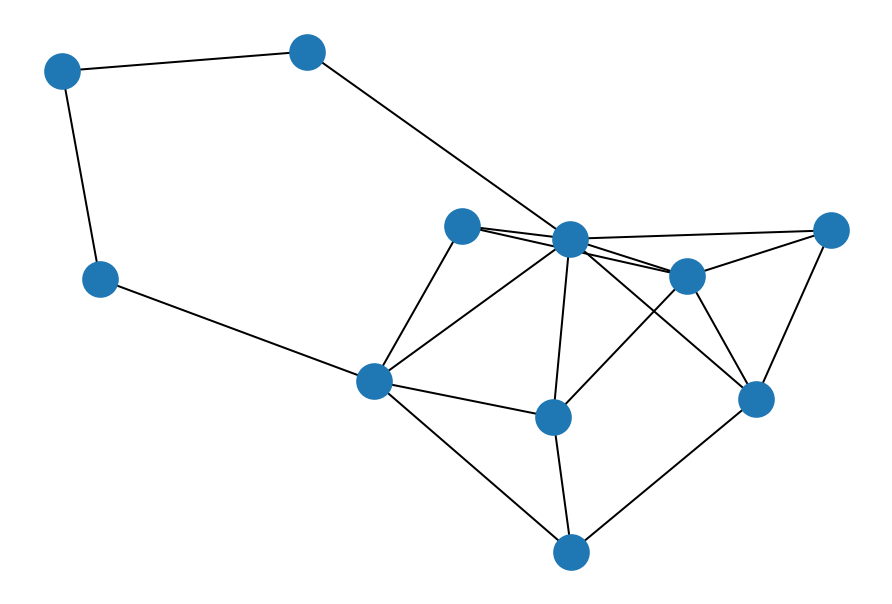

In [6]:
# Draw network
nx.draw(G)


The graph/network is drawn with labels on the nodes by default. You can change that by using the command se the command nx.draw(G, with_labels=True)

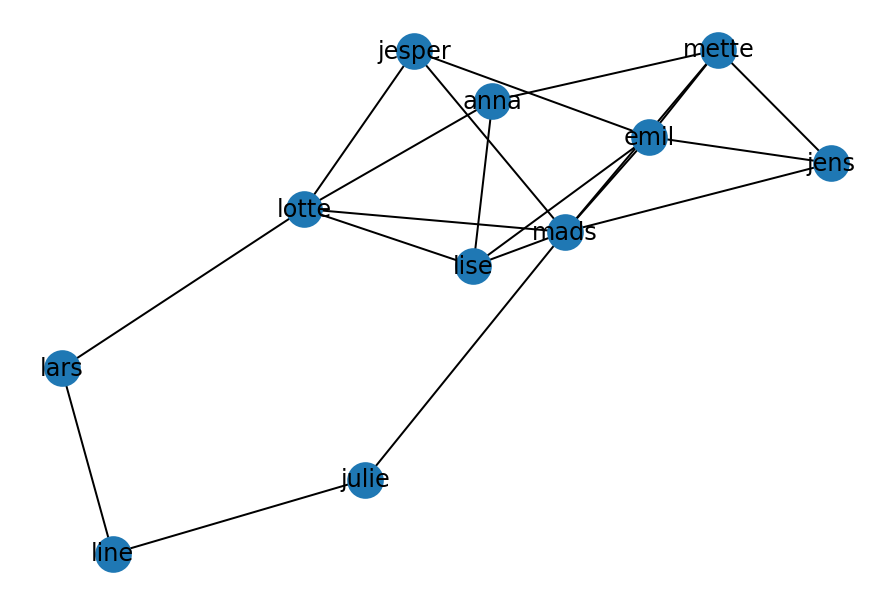

In [8]:
# Draw network with labels
nx.draw(G, with_labels=True)

The two networks may not look completely alike. This is simply because the angel in which is is displayed is not the same. The overall structure (topology) of the networks are the same.

Below you can see a code that can help you substract a graph showing only the play mates of a specific kid. In the example below you will see who Anna has been playing with that day (you do not need to understand the entire code)

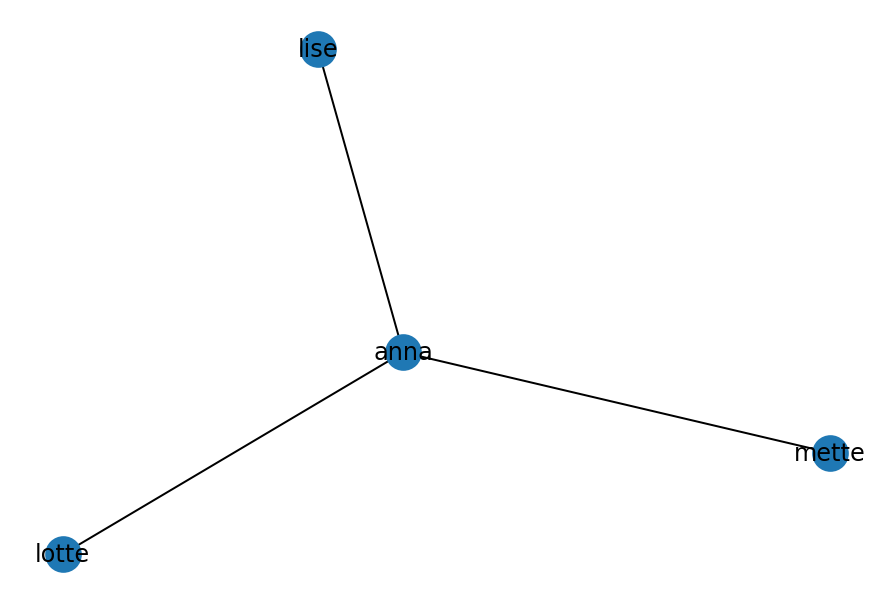

In [9]:
def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        if (node, neighbor) in G.edges() or (neighbor, node) in G.edges():
            newG.add_edge(node, neighbor)

    return newG

fig = plt.figure(1)
newG = extract_neighbor_edges2(G, 'anna')
nx.draw(newG, with_labels=True)

Below is a copy of the code above - modify the code to show a graph of the playmates of Mads. 

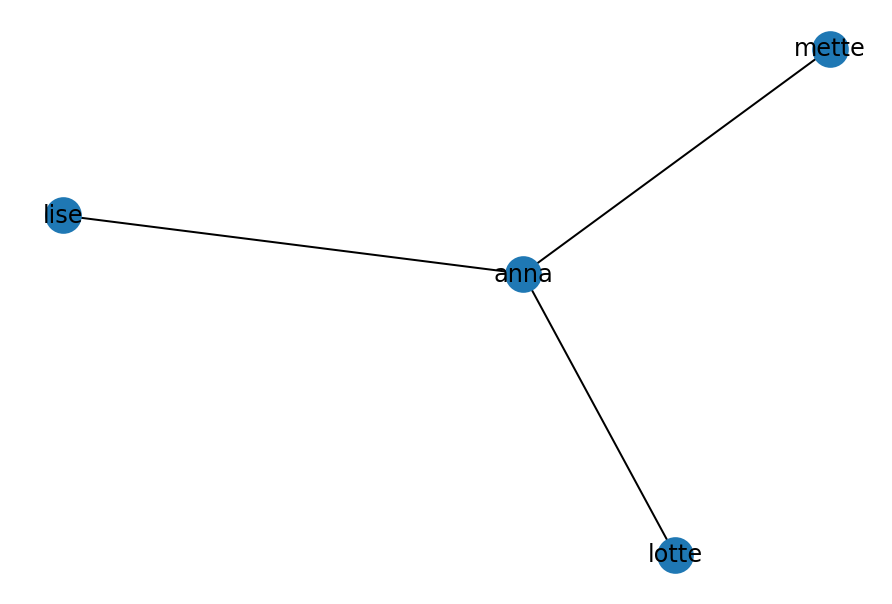

In [7]:
def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        if (node, neighbor) in G.edges() or (neighbor, node) in G.edges():
            newG.add_edge(node, neighbor)

    return newG

fig = plt.figure(1)
newG = extract_neighbor_edges2(G, 'anna')
nx.draw(newG, with_labels=True)

**Add your answers here**
*(double-click here to edit the cell)*

***Question I: What is the name of the kids that Anna played with that day?***

_Answer_

***Question II: How many kids did Mads play with that day?***

_Answer_


### Exercise 3 - Extracting information about neighbors (centrality), degree of centrality and ranking based on centrality. 
We just saw how we could get subgraphs containing the playmates of a specific kid - in graph theory these will be the neighbors of a specific node. We can also make commands that will give us the information as numbers and lists. 

If we would like to know the neighbors (here playmates) of e.g. the first node (here Mads), we can use the G.neighbors(node) function.

In [8]:
# Neighbors of the node with the name "mads"
list(G.neighbors('mads'))

['emil', 'lise', 'mette', 'jesper', 'lotte', 'jens', 'julie']

The number of neighbors - i.e. the number of other nodes, that one node is connected to - is a measure of the nodes centrality. We could count them like we did above - or we could use the len function to find out the length of the list above. Let's use the len function

In [9]:
# The number of neighbors of the node "mads"? (i.e. what is the centrality of "mads")
len(list(G.neighbors('mads')))

7

Now pick any kid and calculate its centrality and see who the kid played with


In [13]:
# List of neighbors


In [14]:
# Calculation of centrality


The next script illustrate the possibility to rank the nodes based on the their centrality. It starts with pd. indicating that it is a function from the pandas package. Here the five kids with the highest centrality ranked with the highest centrality ranked at the top. 

In [10]:
(pd.Series({n: len(list(G.neighbors(n))) 
            for n in G.nodes()})
 .sort_values(ascending=False)
 .head(5)
)

mads     7
lotte    5
emil     5
lise     4
mette    4
dtype: int64

Now try to change the copy of the code to rank all the kids based on their centrality

In [16]:
(pd.Series({n: len(list(G.neighbors(n))) 
            for n in G.nodes()})
 .sort_values(ascending=False)
 .head(5)
)

mads     7
lotte    5
emil     5
lise     4
mette    4
dtype: int64

*(This could be done either by changing 5 to the total number of nodes or by deleting .head(5) completely)*

Sometimes we are not only interested in the number of neighbors (centrality), but also in the degree of centrality. Here you see how we can make a list of the nodes along with their degree of centrality. The list is not ranked, but listed according to their original order in the csv file. 

In [11]:
# nx.degree_centrality(G)
list(nx.degree_centrality(G).items())[0:5]

[('mads', 0.7000000000000001),
 ('emil', 0.5),
 ('anna', 0.30000000000000004),
 ('mette', 0.4),
 ('lise', 0.4)]

**Add your answers here**
*(double-click here to edit the cell)*

***Question I: What will happen if you change False to True in the code ranking the centralities?***

_Answer_

***Question II: How many of the kids only had a single playmate at the day of the study***

_Answer_



### Exercise 4 - Sick or not sick?
Now, in the csv file we also have information about whether or not the kids got sick or not. Let us use this information and see if it can tell us something about the contamination.

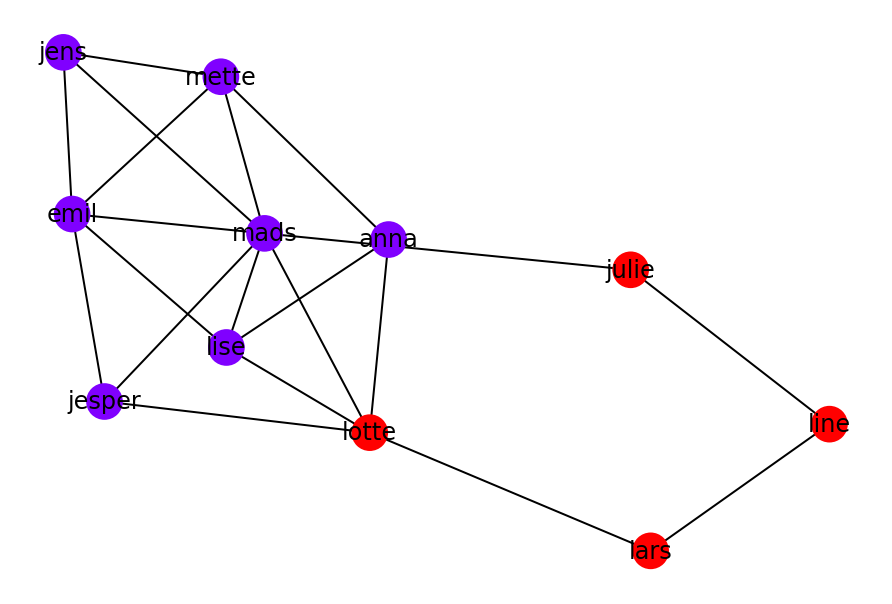

In [12]:
val_map = {'lotte': 1.6,
           'lars': 1.6,
           'line': 1.6,
          'julie':1.6}

values = [val_map.get(node, 1.0) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('rainbow'), node_color=values, with_labels=True, font_color='black')
plt.show()

### Exercise 5 - Extra - adding new nodes and edges

Ups - during the data collection some of the kids forgot that they also played with Hans that day! Here we will show you how to add Hans to the network. You may try to add even more kids to the network.

In [13]:
G.add_node('hans')

In [14]:
# Add multiple edges
G.add_edges_from([
    ('hans', 'lars'),
    ('hans', 'line'),
])

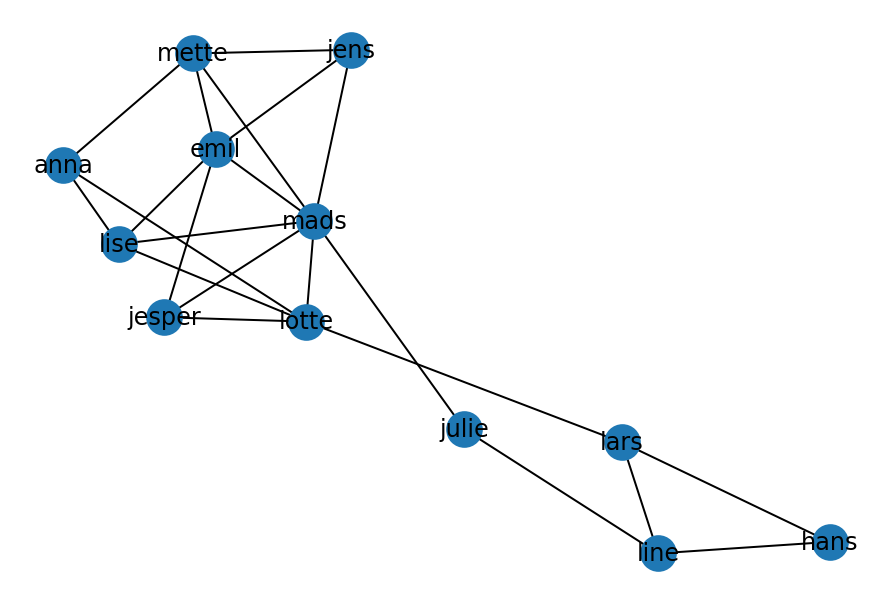

In [15]:
nx.draw(G, with_labels=True)